In [ ]:

"""
Gender Identity Analysis - Jupyter Optimized
Creates histogram and pie chart from CSV data
"""
import sys
import os
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt

# Print system info for debugging (helpful for Jupyter)
print(f"Python version: {sys.version}")
print(f"Current directory: {os.getcwd()}")
print("-" * 50)

# ✅ Load the CSV file
df = pd.read_csv("https://raw.githubusercontent.com/LDolanLDolan/job-insight-live/master/gender_identity_by_area.csv")

df = df[df['Gender identity (8 categories)'] != 'Does not apply']



Python version: 3.13.5 (tags/v3.13.5:6cb20a2, Jun 11 2025, 16:15:46) [MSC v.1943 64 bit (AMD64)]
Current directory: c:\Users\DELL\job_insight_live
--------------------------------------------------


In [9]:
# Import required libraries with error handling
try:
    import pandas as pd
    import matplotlib.pyplot as plt
    print("✅ Successfully imported pandas and matplotlib")
except ImportError as e:
    print(f"❌ Import error: {e}")
    print("Install missing packages with:")
    print("pip install pandas matplotlib")

✅ Successfully imported pandas and matplotlib


In [10]:
def load_and_validate_data(csv_file="gender_identity_by_area.csv"):
    """Load CSV file with validation"""
    try:
        # Check if file exists
        if not Path(csv_file).exists():
            print(f"❌ File not found: {csv_file}")
            print(f"Current directory contents: {list(Path('.').glob('*.csv'))}")
            return None
        
        # Load the CSV file
        df = pd.read_csv(csv_file)
        print(f"✅ Successfully loaded {csv_file}")
        print(f"📊 Data shape: {df.shape}")
        print(f"📋 Columns: {list(df.columns)}")
        
        return df
    
    except Exception as e:
        print(f"❌ Error loading CSV: {e}")
        return None

def display_data_summary(df):
    """Display useful data summary"""
    try:
        print("\n📈 DATA SUMMARY:")
        print("=" * 40)
        
        # Show unique gender categories
        gender_categories = df['Gender identity (8 categories)'].unique()
        print(f"Gender categories ({len(gender_categories)}):")
        for i, category in enumerate(gender_categories, 1):
            print(f"  {i}. {category}")
        
        # Show unique authorities
        authorities = df['Lower Tier Local Authorities'].unique()
        print(f"\nLocal authorities ({len(authorities)}):")
        for i, authority in enumerate(authorities[:5], 1):  # Show first 5
            print(f"  {i}. {authority}")
        if len(authorities) > 5:
            print(f"  ... and {len(authorities) - 5} more")
        
        # Show total observations
        total_obs = df['Observation'].sum()
        print(f"\nTotal observations: {total_obs:,}")
        
    except Exception as e:
        print(f"❌ Error displaying summary: {e}")

In [11]:
# Load and examine the data
print("🚀 Starting Gender Identity Analysis")
print("=" * 50)

df = load_and_validate_data()
if df is not None:
    display_data_summary(df)
else:
    print("Cannot proceed without data")

🚀 Starting Gender Identity Analysis
✅ Successfully loaded gender_identity_by_area.csv
📊 Data shape: (2648, 5)
📋 Columns: ['Lower Tier Local Authorities Code', 'Lower Tier Local Authorities', 'Gender identity (8 categories) Code', 'Gender identity (8 categories)', 'Observation']

📈 DATA SUMMARY:
Gender categories (8):
  1. Does not apply
  2. Gender identity the same as sex registered at birth
  3. Gender identity different from sex registered at birth but no specific identity given
  4. Trans woman
  5. Trans man
  6. Non-binary
  7. All other gender identities
  8. Not answered

Local authorities (331):
  1. Hartlepool
  2. Middlesbrough
  3. Redcar and Cleveland
  4. Stockton-on-Tees
  5. Darlington
  ... and 326 more

Total observations: 48,566,402



📊 Creating histogram...
📊 Filtered data shape: (2317, 5)


C:\Users\DELL\AppData\Local\Temp\ipykernel_10912\2568157307.py:24: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


✅ Histogram saved as gender_identity_histogram_log.png


<Figure size 1200x600 with 0 Axes>

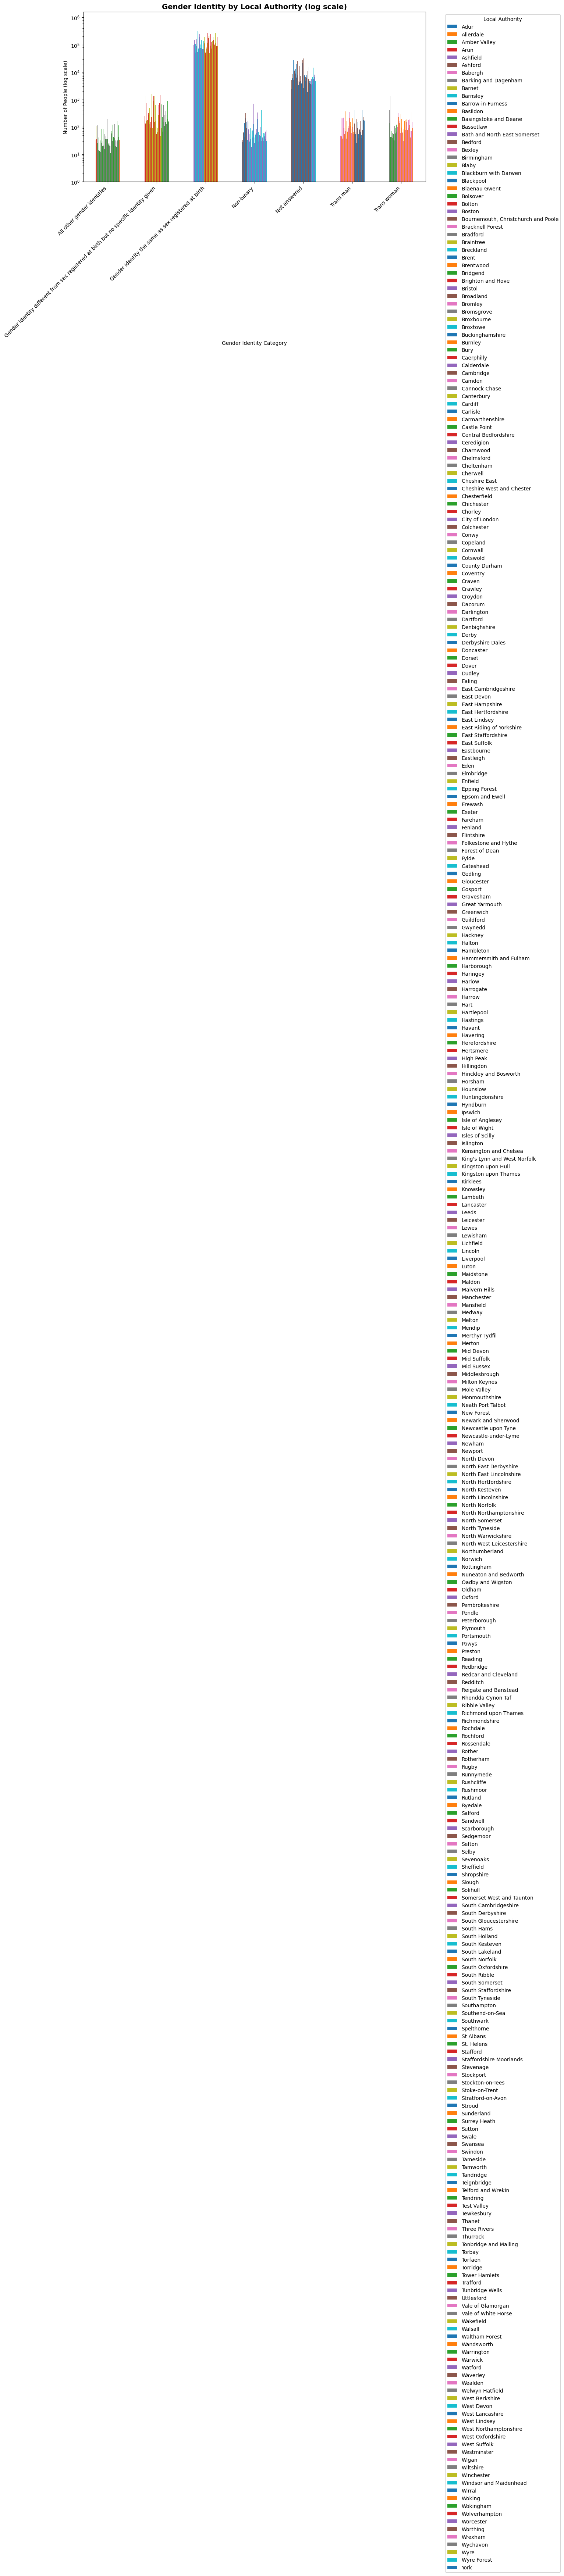

In [12]:
def create_histogram(df, save_file="gender_identity_histogram_log.png"):
    """Create and save histogram"""
    try:
        # Filter out 'Does not apply'
        df_filtered = df[df['Gender identity (8 categories)'] != 'Does not apply']
        print(f"📊 Filtered data shape: {df_filtered.shape}")
        
        # Pivot data: gender identity vs authority
        pivot_df = df_filtered.pivot(
            index='Gender identity (8 categories)',
            columns='Lower Tier Local Authorities',
            values='Observation'
        )
        
        # Create bar chart
        plt.figure(figsize=(12, 6))
        ax = pivot_df.plot(kind='bar', figsize=(12, 6), log=True)
        
        plt.title("Gender Identity by Local Authority (log scale)", fontsize=14, fontweight='bold')
        plt.ylabel("Number of People (log scale)")
        plt.xlabel("Gender Identity Category")
        plt.xticks(rotation=45, ha='right')
        plt.legend(title="Local Authority", bbox_to_anchor=(1.05, 1), loc='upper left')
        plt.tight_layout()
        
        # Save the plot
        plt.savefig(save_file, dpi=300, bbox_inches='tight')
        print(f"✅ Histogram saved as {save_file}")
        
        # Show in Jupyter
        plt.show()
        
        return True
        
    except Exception as e:
        print(f"❌ Error creating histogram: {e}")
        return False

# Create the histogram
if df is not None:
    print("\n📊 Creating histogram...")
    histogram_success = create_histogram(df)


🥧 Creating pie chart...
✅ Pie chart saved as gender_identity_pie_chart.png


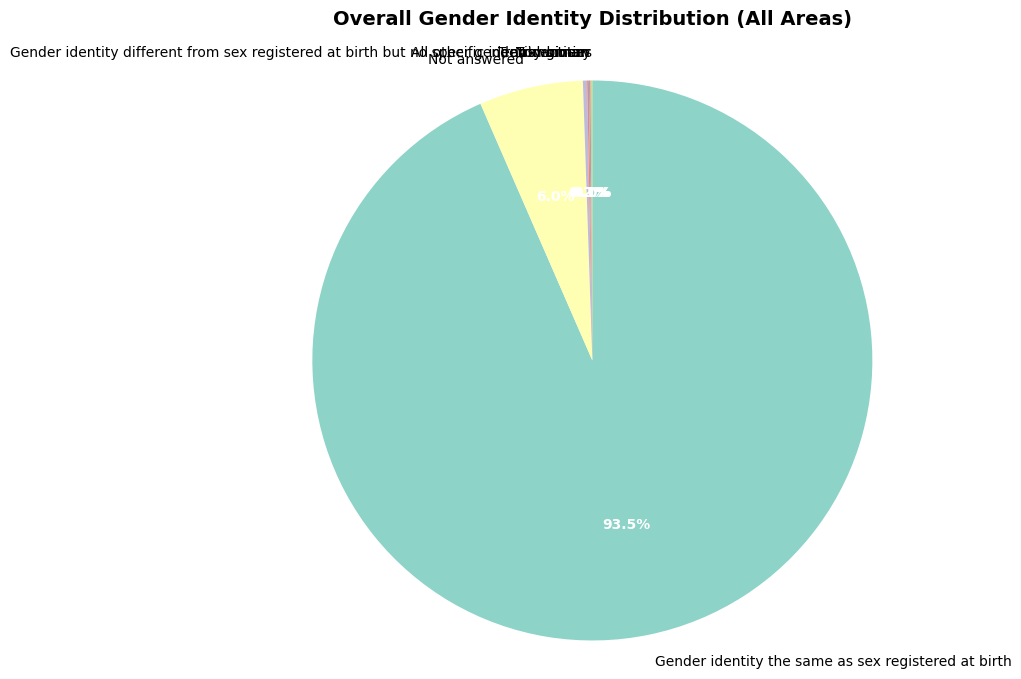

In [13]:
def create_pie_chart(df, save_file="gender_identity_pie_chart.png"):
    """Create and save pie chart"""
    try:
        # Filter out 'Does not apply'
        df_filtered = df[df['Gender identity (8 categories)'] != 'Does not apply']
        
        # Create summary data
        summary_df = df_filtered.groupby('Gender identity (8 categories)')['Observation'].sum().sort_values(ascending=False)
        
        # Create pie chart
        plt.figure(figsize=(10, 8))
        colors = plt.cm.Set3(range(len(summary_df)))
        
        wedges, texts, autotexts = plt.pie(
            summary_df, 
            labels=summary_df.index, 
            autopct='%1.1f%%', 
            startangle=90, 
            counterclock=False,
            colors=colors
        )
        
        # Improve text readability
        for autotext in autotexts:
            autotext.set_color('white')
            autotext.set_fontweight('bold')
        
        plt.title("Overall Gender Identity Distribution (All Areas)", 
                 fontsize=14, fontweight='bold', pad=20)
        plt.axis('equal')
        
        # Save the plot
        plt.savefig(save_file, dpi=300, bbox_inches='tight')
        print(f"✅ Pie chart saved as {save_file}")
        plt.show()
        
        return True
        
    except Exception as e:
        print(f"❌ Error creating pie chart: {e}")
        return False

# Create the pie chart
if df is not None:
    print("\n🥧 Creating pie chart...")
    pie_success = create_pie_chart(df)

In [14]:
# Final results summary
if 'df' in locals() and df is not None:
    print("\n🎉 Analysis completed!")
    print("📁 Files created:")
    if 'histogram_success' in locals() and histogram_success:
        print("  ✅ gender_identity_histogram_log.png")
    if 'pie_success' in locals() and pie_success:
        print("  ✅ gender_identity_pie_chart.png")
    
    print(f"\n📊 Final data info:")
    print(f"  • Total rows: {len(df):,}")
    print(f"  • Total observations: {df['Observation'].sum():,}")
    print(f"  • Gender categories: {df['Gender identity (8 categories)'].nunique()}")
    print(f"  • Local authorities: {df['Lower Tier Local Authorities'].nunique()}")
else:
    print("❌ Analysis could not be completed")


🎉 Analysis completed!
📁 Files created:
  ✅ gender_identity_histogram_log.png
  ✅ gender_identity_pie_chart.png

📊 Final data info:
  • Total rows: 2,648
  • Total observations: 48,566,402
  • Gender categories: 8
  • Local authorities: 331
